# K-Means algorithm

This is an implementation from scratch of K-Means algorithm used to perform clustering on a 'mouse dataset'. The code below was used to generate an animation of the algorithm converging to the global optimum.

Coordinate Descent algorithm is used to minimize loss function.


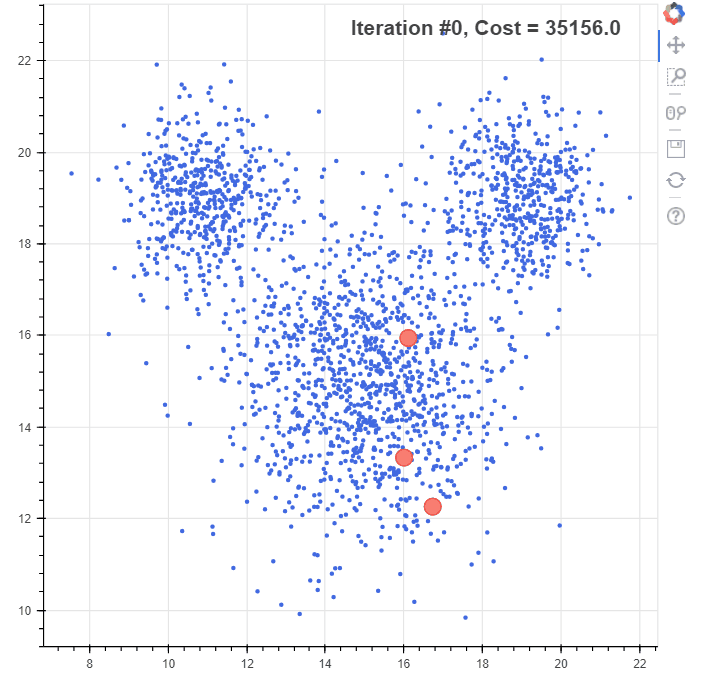

In [1]:
from IPython.display import Image
with open("image/k-means.gif",'rb') as f:
    display(Image(data=f.read(), format='png'))

In [2]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
from bokeh.palettes import all_palettes
from bokeh.models import ColumnDataSource
from bokeh.models import LinearColorMapper
from bokeh.palettes import Viridis3, Viridis256
import time
output_notebook()

Loading BokehJS ...

In [3]:
# Read the 'mouse dataset' from csv file
X = np.genfromtxt('data/mouse.csv')

In [4]:
class KMeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

        
    def initialize_clusters(self, X):
        '''
        Generate initial clusters parameters (mean and points assignments)
        '''
        indexes = np.random.randint(low=0, high=len(X), size=self.n_clusters)
        self.mu = np.array([X[idx, :] for idx in indexes])
        self.cluster = np.random.randint(0, self.n_clusters, X.shape[0])
        self.init_iter = 0
        self.create(X, i=0)
    
    def loss_function(self):
        '''
        Calculate loss function
        '''
        loss = 0
        for xi in range(X.shape[0]):
            loss += (np.linalg.norm(X[xi] - self.mu[self.cluster[xi]], axis=0))**2
        return loss
    
    def _assign_cluster(self, X):
        '''
        Append a label to each point to indicate its cluster assignment
        '''
        return np.column_stack((X, self.cluster))
    
        
    def _adjust_cluster_assignments(self, X):
        '''
        Assign points to clusters based on distance from cluster mean
        '''
        for xi in range(X.shape[0]):
            self.distance = (np.linalg.norm(X[xi] - self.mu, axis=1))**2
            self.cluster[xi] = np.argmin(self.distance, axis=0)
       
    def _adjust_means(self, X):
        '''
        Calculate means according to updated cluster assignments
        '''
        for ki in range(self.n_clusters):
            self.mu[ki] = np.mean(X[self.cluster==ki], axis=0)
            
            
    def fit(self, X, n_iter):
        '''
        Perform Expectation-Maximization algorithm to fit Gaussians
        '''
        #time.sleep(10)
        for i in range(self.init_iter + 1, self.init_iter + n_iter + 1):    
            
            self._adjust_cluster_assignments(X)
            self._adjust_means(X)
            
            self.update(X, i=i)
        
        self.init_iter = i
    
    def create(self, X, i):
        '''
        Create Bokeh plot
        '''
        self.plot = figure(x_range=(6, 24), y_range=((8, 24)))
        self.plot.title.text = "Iteration #%d, Cost = %.1f " %(i, self.loss_function())
        self.plot.title.text_font_size = '14pt'
        self.plot.title.align = 'center'
        
        Xw = self._assign_cluster(X)
        self.source_xyc  = ColumnDataSource(pd.DataFrame(Xw, columns=['x', 'y', 'w']))
        mapper = LinearColorMapper(palette=Viridis256, low=0, high=2)
        self.plot.scatter(x='x', y='y', fill_color={'field': 'w', 'transform': mapper},
                             source=self.source_xyc, line_color=None)
        
        self.source_mu = ColumnDataSource(pd.DataFrame(self.mu, columns=['x', 'y']))
        self.plot.circle(x='x', y='y', source=self.source_mu, fill_color='salmon',
                            line_color='red', size=10, line_width=1, level='overlay')
        
        self.mapper = mapper
        self.handle = show(self.plot, notebook_handle=True)  
        
    def update(self, X, i):
        '''
        Update Bokeh plot
        '''
        self.plot.title.text = "Iteration #%d, Cost = %.1f " %(i, self.loss_function())
        self.source_mu.data = {'x' : self.mu[:,0], 'y' : self.mu[:,1]}
        Xw = self._assign_cluster(X)
        self.source_xyc.data  = {'x' : Xw[:, 0], 'y' : Xw[:, 1], 'w' : Xw[:, 2]}
        push_notebook(handle=self.handle)
    

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.initialize_clusters(X)
kmeans.fit(X, n_iter=20)

In [6]:
# Model can be fitted further starting from the last state (warm start)
kmeans.fit(X, n_iter=15)

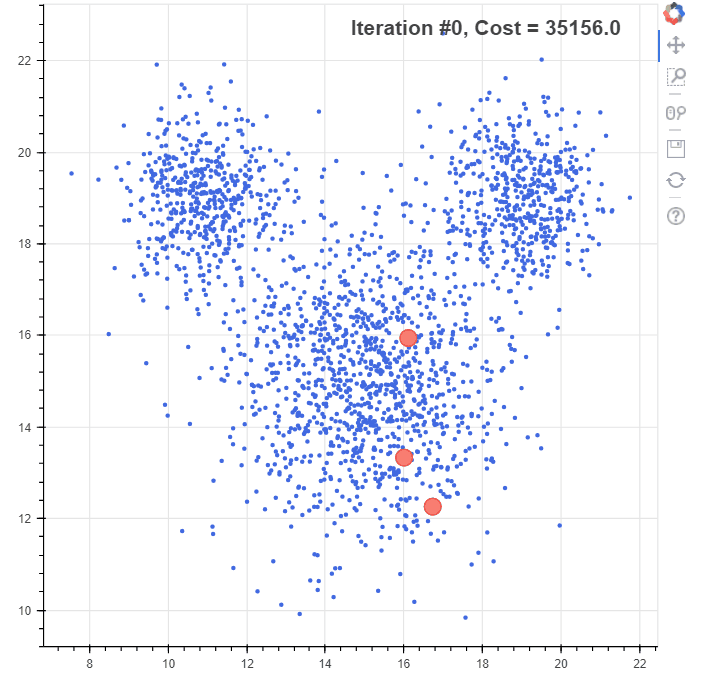

In [7]:
from IPython.display import Image
with open("image/k-means.gif",'rb') as f:
    display(Image(data=f.read(), format='png'))